In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("/content/car.csv")

In [4]:
print(df.head())
print(df.describe())
print(df.info())

                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  
              year  selling_price      km_driven
count  4340.000000   4.340000e+03    4340.000000
mean   2013.090783   5.041273e+05   66215.777419
std       4.215344   5.785487e+05   46644.102194
min    1992.000000   2.000000e+04       1.000000
25%    2011.000000   2.087498e+05   35000.000000
50%    2014.000000   

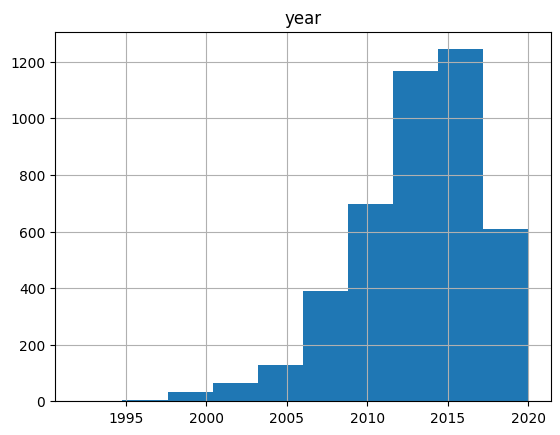

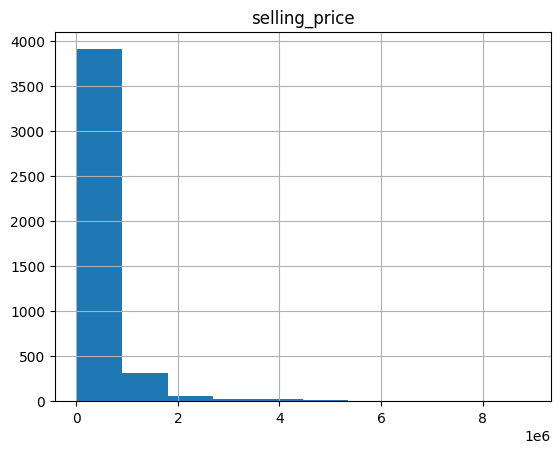

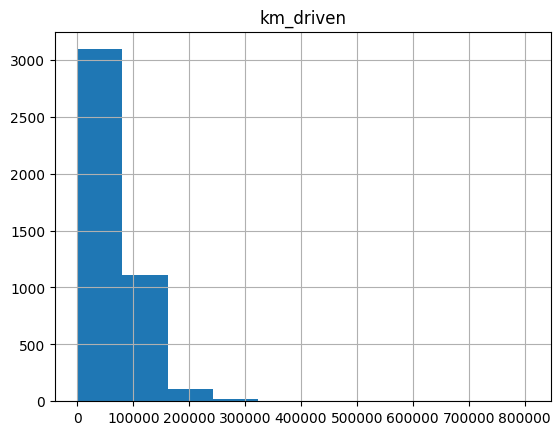

In [5]:
# Histograms for numerical columns
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure()
    df[col].hist()
    plt.title(col)
    plt.show()


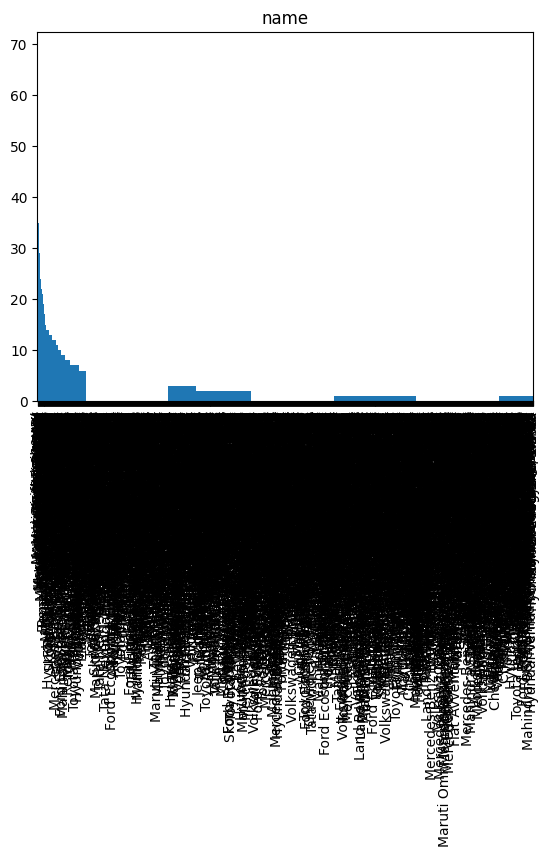

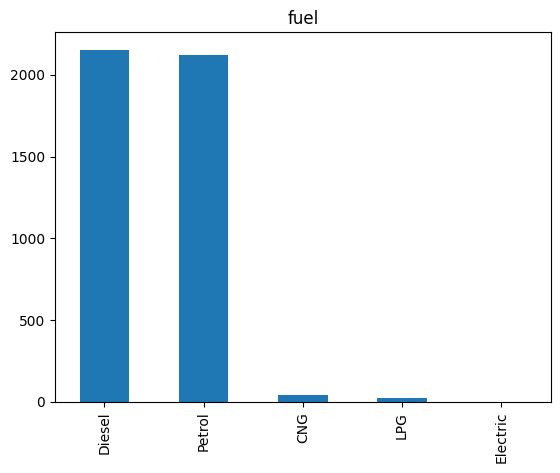

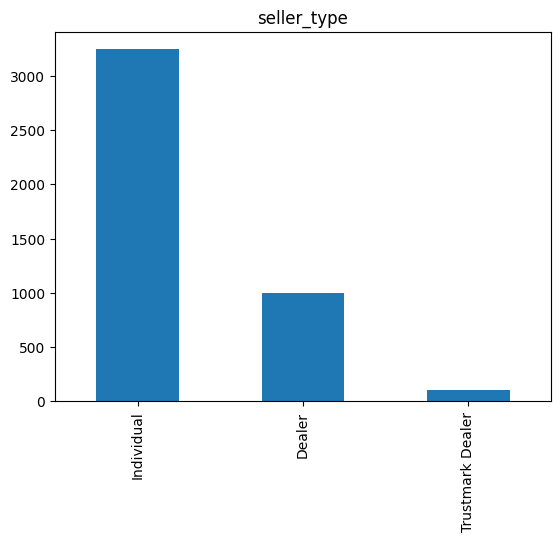

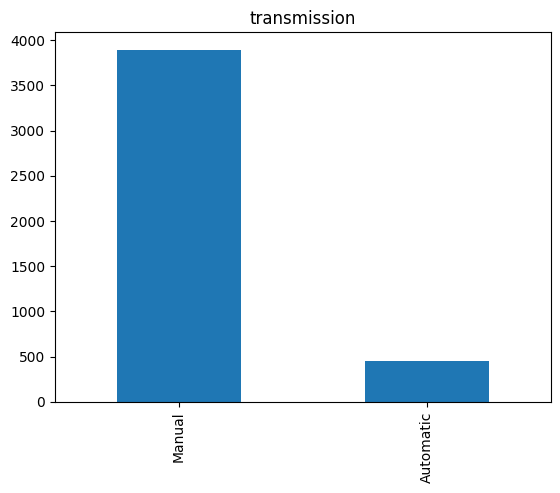

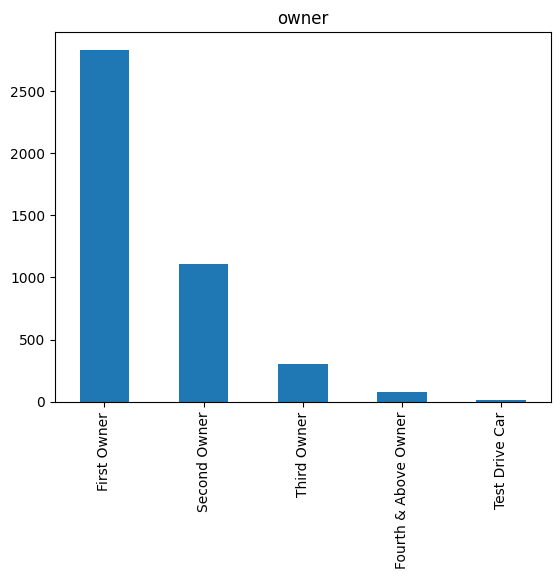

In [6]:
# Bar plots for categorical columns
for col in df.select_dtypes(include=['object']).columns:
    plt.figure()
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

<ipython-input-7-256a630a5c6b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


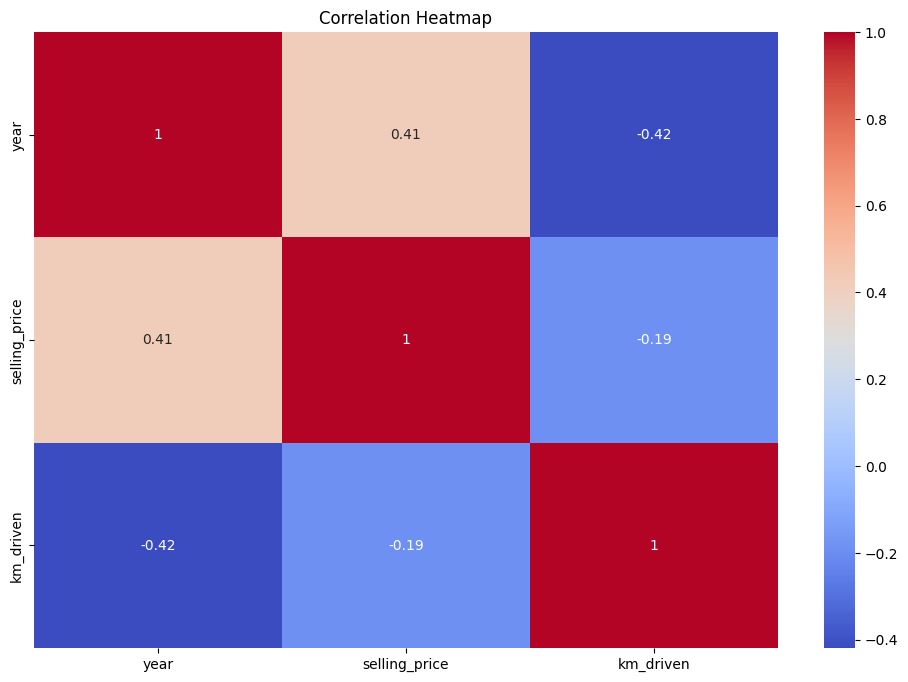

In [7]:
# Correlation heatmap for numerical columns
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

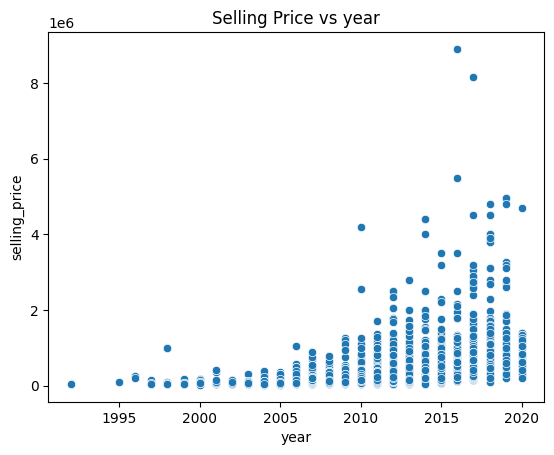

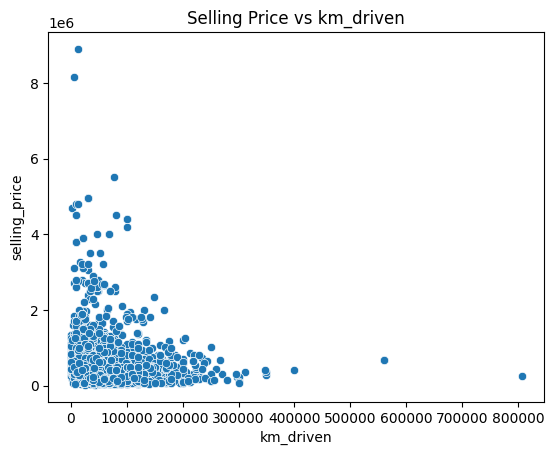

In [8]:
# Scatter plots for numerical columns against selling price
for col in df.select_dtypes(include=['int64', 'float64']).drop('selling_price', axis=1).columns:
    plt.figure()
    sns.scatterplot(data=df, x=col, y='selling_price')
    plt.title(f'Selling Price vs {col}')
    plt.show()

In [9]:
# 5. Data Preprocessing
# Encoding categorical columns
df_encoded = pd.get_dummies(df, columns=["fuel", "seller_type", "transmission"], drop_first=True)
owner_mapping = {'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 5}
df_encoded['owner'] = df_encoded['owner'].map(owner_mapping)


In [10]:
# Scaling numerical columns
scaler = StandardScaler()
num_cols = ['year', 'selling_price', 'km_driven', 'owner']
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


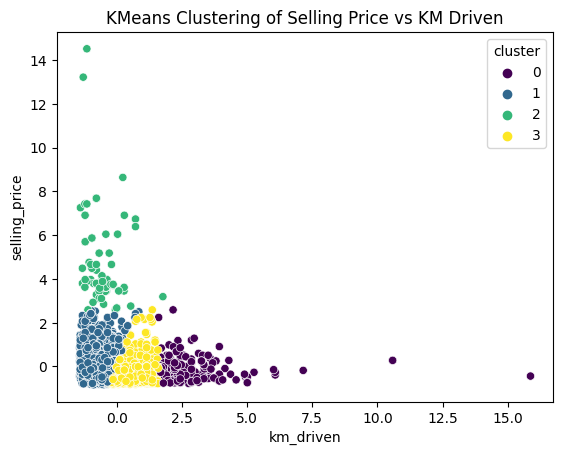

In [11]:
# 6. Clustering Visualization
kmeans = KMeans(n_clusters=4, random_state=42)
df_encoded['cluster'] = kmeans.fit_predict(df_encoded[['selling_price', 'km_driven']])
sns.scatterplot(data=df_encoded, x='km_driven', y='selling_price', hue='cluster', palette='viridis')
plt.title('KMeans Clustering of Selling Price vs KM Driven')
plt.show()

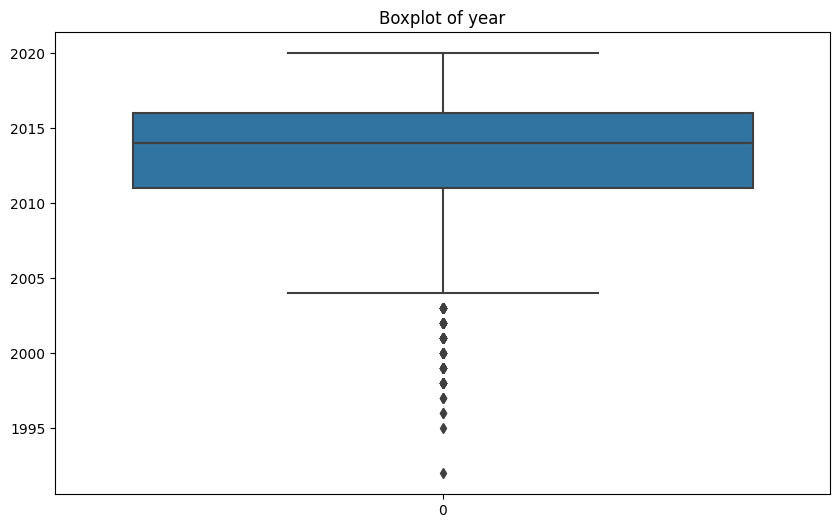

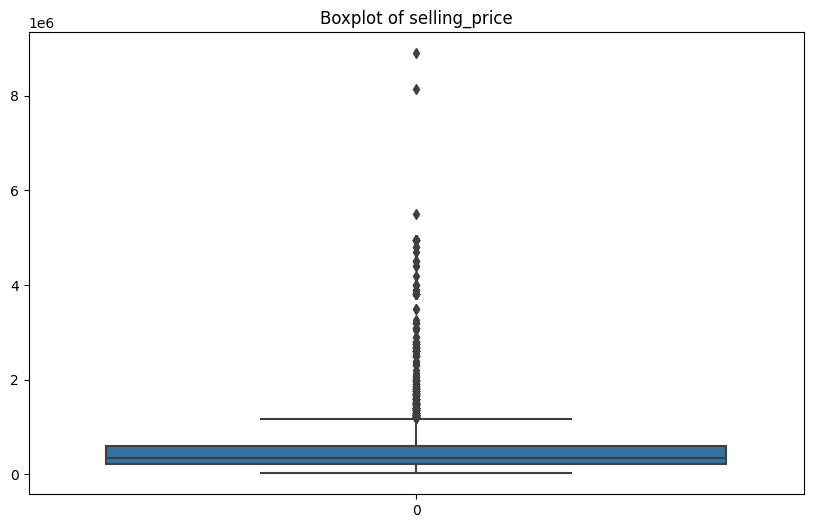

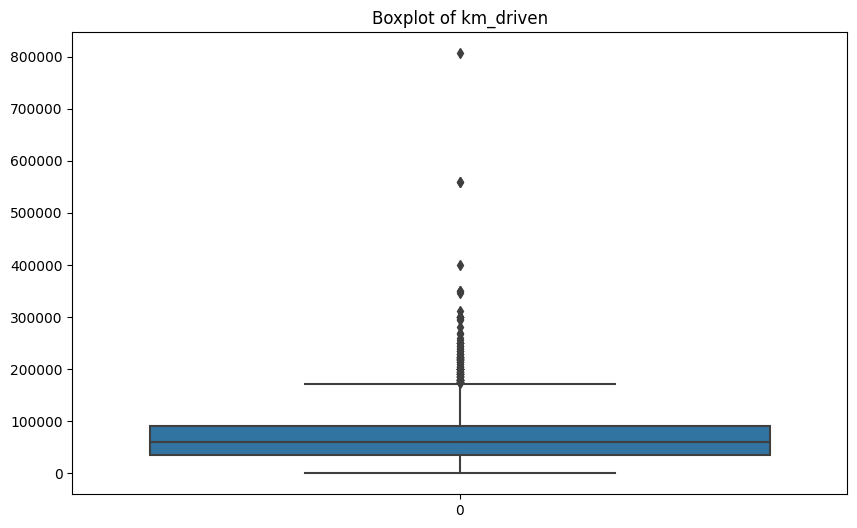

In [12]:
# 7. Boxplots for viewing outliers
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

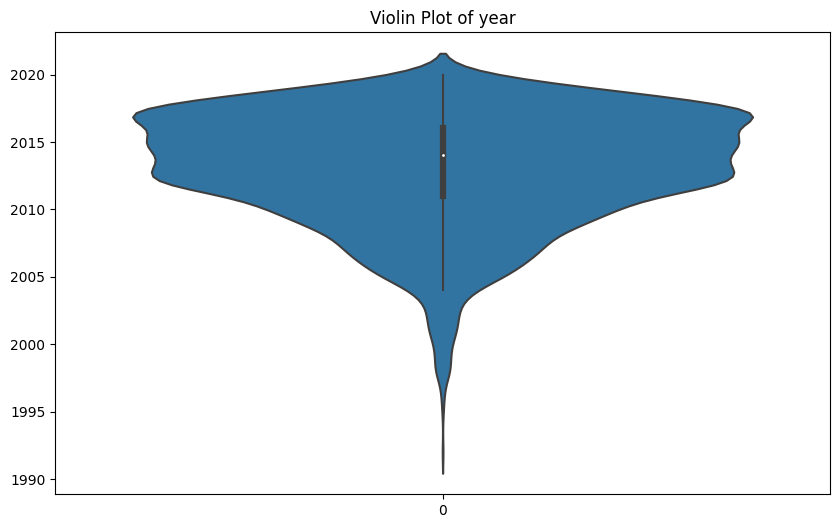

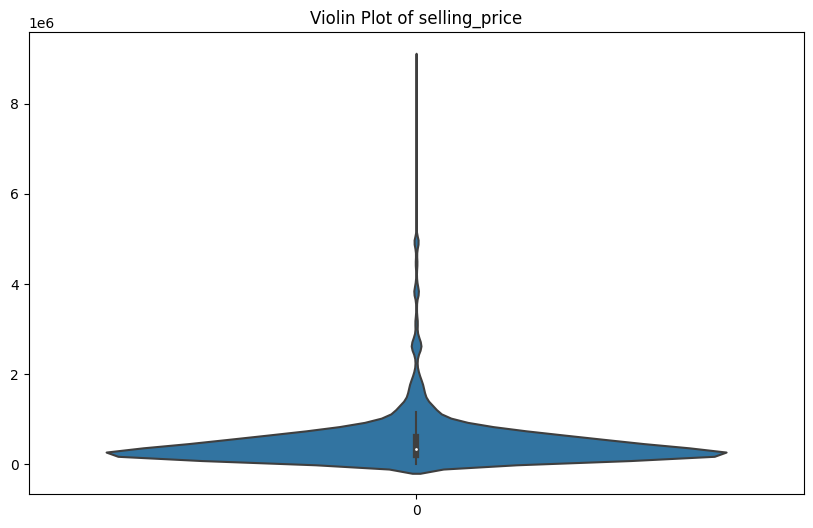

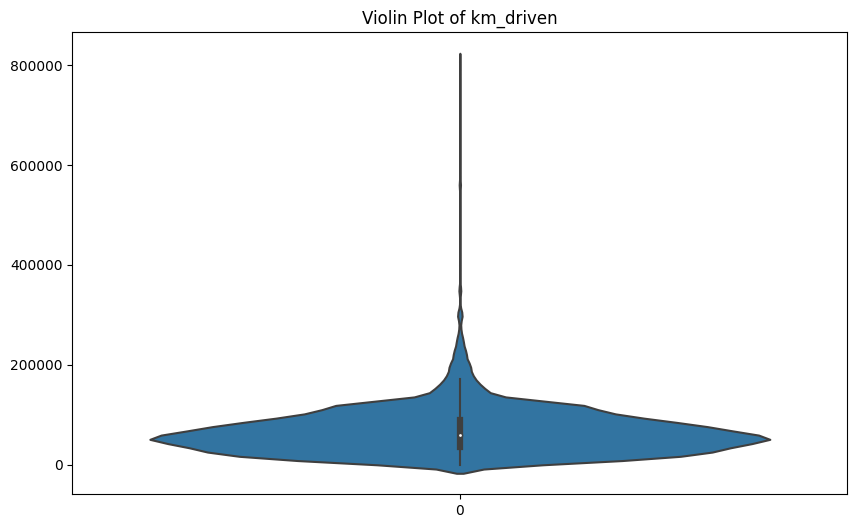

In [13]:
# 8. Violin plots for viewing distribution and density
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(10,6))
    sns.violinplot(df[col])
    plt.title(f'Violin Plot of {col}')
    plt.show()